<a href="https://colab.research.google.com/github/maikejulie/DNN4Cli/blob/main/THOR/Step1/Step1_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import IPython.display as dis
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster

In [2]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
mycmap = ListedColormap(['royalblue', 'cyan','yellow', 'orange', 'magenta', 'red'])

# THOR Step 1 : Clustering ocean regimes

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
%cd /gdrive

/gdrive


## Budget closure terms

In [5]:
curlA = np.transpose(np.load('My Drive/colabwithMaike/closeThebudget/curlA.npy'))
curlB = np.transpose(np.load('My Drive/colabwithMaike/closeThebudget/curlB.npy'))
curlCori = np.transpose(np.load('My Drive/colabwithMaike/closeThebudget/curlCori.npy'))
curlTau = np.transpose(np.load('My Drive/colabwithMaike/closeThebudget/curlTau.npy'))
BPT = np.transpose(np.load('My Drive/colabwithMaike/closeThebudget/BPT.npy'))
noisemask = np.transpose(np.load('My Drive/colabwithMaike/closeThebudget/noiseMask.npy'))

# Clustering (Sonnewald et al. 2019)

In [6]:
Outputdata = np.stack((curlA,curlB,curlTau,curlCori,BPT),axis=2)
Outputdata.shape

(360, 720, 5)

In [7]:
## throwing out indices of land pixels and bad pixels
indmiss = (noisemask==1.).flatten()
## preparing data for k-means
Outputdata_m = np.reshape(Outputdata, (360*720, 5))[indmiss]
Outputdata_m.shape

(149714, 5)

In [8]:
scaler = StandardScaler()
Outputdata_s = scaler.fit_transform(Outputdata_m)

## K-means

In [9]:
%%time
KM_all = cluster.KMeans(n_clusters=50, random_state=42, n_init=50)
kmeans_labels = KM_all.fit_predict(Outputdata_s)

In [11]:
cls = np.nan * np.ones(Outputdata.shape[0]*Outputdata.shape[1])
cls[indmiss] = kmeans_labels

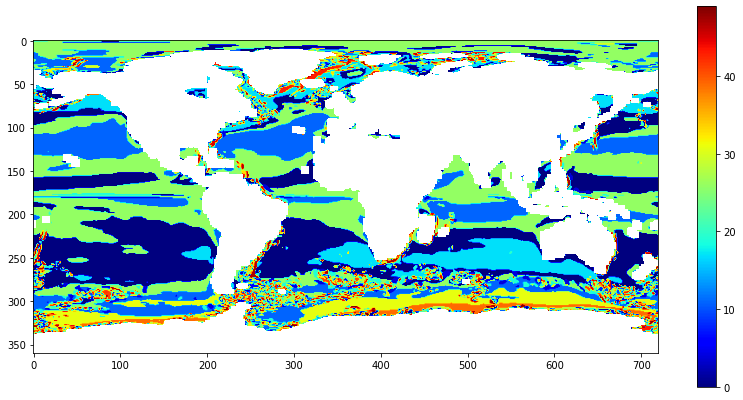

In [18]:
plt.figure(figsize=(14,7))
plt.imshow(np.reshape(cls,Outputdata.shape[0:2])[::-1,:], cmap='jet')
plt.colorbar()

In Sonnewald et al. 2019, authors did check the AIC/BIC criteria to validate the choice of the 50 classes. However, for the following steps, we'll keep the most represented classes and merge the rest, we obtain 6 classes: 5 most represented classes and the 45 other classes are grouped into one class, this is saved in the kcluster6 file

In [30]:
classes6 = np.transpose(np.load('My Drive/colabwithMaike/closeThebudget/kCluster6.npy'))
classes6[~indmiss.reshape((360,720))]=np.nan ## land pixels and other bad pixels

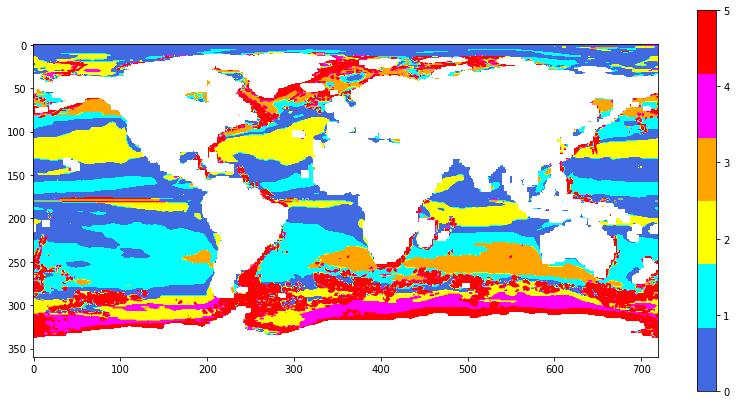

In [32]:
plt.figure(figsize=(14,7))
plt.imshow(classes6[::-1,:], cmap=mycmap, vmin=0, vmax=5)
plt.colorbar()